

![title](imgs/coronavirus.jpg)

This notebook will analyse COVID-19 data. The data will be obtained from [Our World In Data](https://ourworldindata.org/coronavirus), a scientific online publication whose research team is based at the University of Oxford and focuses on large global problems.

# Business understanding

Covid-19 is a contagious respiratory disease that is thought to have originated in Wuhan, China. In 2020, many countries imposed lockdowns to tackle the spread of this disease, and the debate about whether this is a good approach has been heated. Some countries, noteably Sweden and Brazil, did not impose stringent lockdowns.

## Objectives and questions to be answered

I will attempt to answer:

- Which countries were most affected by Covid-19 (In terms of total case numbers and total death counts)?
- What percentage of worldwide cases is accounted for by the top 10 countries by case numbers?
- If we account for population size of a country by looking at cases/deaths per million of the population, which countries were most affected?
- Which countries did the most testing for Covid 19?
- How did the rise of Covid look? Does it come in waves?
- How did lockdowns, in particular the UK lockdown, affect the rise in new deaths? How long did it take for the daily death rates to slow down after the UK lockdowns?
- Which countries suffered the most economic impact as measured by the Q2 2020 vs Q2 2019 GDP decrease?
- A closer look at Brazil: how did the lack of lockdown fare for Brasil?
- A close look at Scandinavia and Sweden: how did the Swedish policy fare compared to its neighbours?

## How we will answer those questions

To answer these questions we will make use of pandas to load and wrangle the data, and then the library seaborn to gain visual insights to the processed data that will help us clearly answer the questions of interest.


# Data Loading

# Import the libraries we will use:

In [120]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Useful variable (use yesterday instead of today as current date as depending on when you run this notebook, wouldn't be data always for today)
today = (pd.to_datetime('today') - pd.Timedelta('1 days')).strftime("%Y-%m-%d")


# import dataset and create a data frame
df = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

# Data understanding

In [121]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2019-12-31,nan,0.0,nan,nan,0.0,nan,...,"1,803.987",nan,597.029,9.59,nan,nan,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-01-01,nan,0.0,nan,nan,0.0,nan,...,"1,803.987",nan,597.029,9.59,nan,nan,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-01-02,nan,0.0,nan,nan,0.0,nan,...,"1,803.987",nan,597.029,9.59,nan,nan,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-01-03,nan,0.0,nan,nan,0.0,nan,...,"1,803.987",nan,597.029,9.59,nan,nan,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-01-04,nan,0.0,nan,nan,0.0,nan,...,"1,803.987",nan,597.029,9.59,nan,nan,37.746,0.5,64.83,0.498


**Data dimensions**

In [2]:
print(f'The DataFrame has {df.shape[0]} rows and {df.shape[1]} columns')

The DataFrame has 57826 rows and 50 columns


**What columns do we have?**

In [78]:
', '.join([col for col in df.columns])

'iso_code, continent, location, date, total_cases, new_cases, new_cases_smoothed, total_deaths, new_deaths, new_deaths_smoothed, total_cases_per_million, new_cases_per_million, new_cases_smoothed_per_million, total_deaths_per_million, new_deaths_per_million, new_deaths_smoothed_per_million, reproduction_rate, icu_patients, icu_patients_per_million, hosp_patients, hosp_patients_per_million, weekly_icu_admissions, weekly_icu_admissions_per_million, weekly_hosp_admissions, weekly_hosp_admissions_per_million, total_tests, new_tests, total_tests_per_thousand, new_tests_per_thousand, new_tests_smoothed, new_tests_smoothed_per_thousand, tests_per_case, positive_rate, tests_units, stringency_index, population, population_density, median_age, aged_65_older, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, diabetes_prevalence, female_smokers, male_smokers, handwashing_facilities, hospital_beds_per_thousand, life_expectancy, human_development_index'

**What data types are our columns?**

In [79]:
df.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

In [80]:
df.dtypes

iso_code                               object
continent                              object
location                               object
date                                   object
total_cases                           float64
new_cases                             float64
new_cases_smoothed                    float64
total_deaths                          float64
new_deaths                            float64
new_deaths_smoothed                   float64
total_cases_per_million               float64
new_cases_per_million                 float64
new_cases_smoothed_per_million        float64
total_deaths_per_million              float64
new_deaths_per_million                float64
new_deaths_smoothed_per_million       float64
reproduction_rate                     float64
icu_patients                          float64
icu_patients_per_million              float64
hosp_patients                         float64
hosp_patients_per_million             float64
weekly_icu_admissions             

**We can see that the admissions to icu units and hospitals data is lacking the most. Also data on testing is lacking.**

In [81]:
print(f"Mean total cases per country on {today} is {df.loc[df['date'] == today]['total_cases'].mean():,.0f}")

Mean total cases per country on 2020-11-18 is 518,608


In [82]:
print(f"Mean total deaths per country on {today} is {df.loc[df['date'] == today]['total_deaths'].mean():,.0f}")

Mean total deaths per country on 2020-11-18 is 13,809


In [83]:
world_cases = df[(df['date'] == today) &  (df['location']=='World')].iloc[0]['total_cases']
print(f'There are {world_cases:,} worldwide cases on {today}')

There are 55,763,868.0 worldwide cases on 2020-11-18


In [84]:
world_deaths = df[(df['date'] == today) &  (df['location']=='World')].iloc[0]['total_deaths']
print(f'There are {world_deaths:,} worldwide deaths on {today}')

There are 1,340,039.0 worldwide deaths on 2020-11-18


# Data preparation

It's best if we have the dates in the dates column to be pandas data objects rather than strings. This helps especially with x-axis labelling not getting overcrowded when making plots

In [122]:
df.date = pd.to_datetime(df.date)

In [61]:
df.dtypes

iso_code                                      object
continent                                     object
location                                      object
date                                  datetime64[ns]
total_cases                                  float64
new_cases                                    float64
new_cases_smoothed                           float64
total_deaths                                 float64
new_deaths                                   float64
new_deaths_smoothed                          float64
total_cases_per_million                      float64
new_cases_per_million                        float64
new_cases_smoothed_per_million               float64
total_deaths_per_million                     float64
new_deaths_per_million                       float64
new_deaths_smoothed_per_million              float64
reproduction_rate                            float64
icu_patients                                 float64
icu_patients_per_million                     f

# Helper functions

In [183]:
def plot_fig(x_name, y_name, data, title, x_label, y_label, plot_type='bar', output_file_name=None, x_figsize=18, y_figsize=9, hue='location', palette='Reds_r',
            leg_fontsize=22, leg_title_fontsize=22, xtick_rot=45, xtick_fontsize=22, tight_layout=True, title_fontsize=35, xlabel_fontsize=25, ylabel_fontsize=25):
    
    """
    Arguments:
        x_name: the column name to be used on the x-axis
        y_name: the column name to be used on the y-axis
        data: the pandas dataframe holding the data to be plotted
        title: the title of the figure
        x_label: the label for the x-axis
        y_label: the label for the y-axis
        plot_type: 'line' or 'bar'
        output_file_name: if present save the plot as this filename (optional)
        x_figsize: horizontal size of the figure (optional)
        y_figsize: vertical size of the figure (optional)
        hue: hue for line plots (optional)
        palette: palette for colors of plot e.g. 'colorblind' is an option (optional)
        leg_fontsize: font size of legend
        leg_title_fontsize: font size of legend title
        xtick_rot: rotatation of x axis ticks
        xticks_fontize: font size for x axis ticks
        tight_layout: controls padding
        title_fontsize: fontsize for figure title
    
    Returns:
        matplotlib figure and ax objects
    
    """
    # create the matplotlib figure instance
    fig, ax = plt.subplots(figsize=(x_figsize, y_figsize))
    sns.set()

    # plot with seaborn
    if plot_type == 'bar':
        ax = sns.barplot(x=x_name, y=y_name, data=data, palette=palette)
    else:
        ax = sns.lineplot(x=x_name, y=y_name, data=data, palette=palette, hue=hue);
    ax.set_title(title, fontsize=title_fontsize)
    ax.set_xlabel(x_label, fontsize=xlabel_fontsize)
    ax.set_ylabel(y_label, fontsize=ylabel_fontsize)
    
    if ax.get_legend():
        plt.setp(ax.get_legend().get_texts(), fontsize=leg_fontsize)  # for legend text
        plt.setp(ax.get_legend().get_title(), fontsize=leg_title_fontsize) # for legend title
    plt.xticks(rotation=xtick_rot)
    ax.tick_params(axis='both', which='major', labelsize=xtick_fontsize)
    
    if tight_layout:
        plt.tight_layout()

    if output_file_name is not None:
        plt.savefig(output_file_name)
        
    return fig, ax

# What countries are most affected by COVID-19?

## A Look at the countries with the most cases

In [152]:
# top  countries - cases
top_N = 10
# Here we exclude 0 as this is the World 
top_cases = df.loc[df['date'] == today, ['location', 'total_cases']].sort_values(by='total_cases', ascending=False)[1:top_N].reset_index(drop=True)
pd.set_option('float_format', '{:,}'.format)
top_cases

,location,total_cases
0,United States,"11,359,802.0"
1,India,"8,912,907.0"
2,Brazil,"5,911,758.0"
3,France,"2,036,755.0"
4,Russia,"1,991,998.0"
5,Spain,"1,525,341.0"
6,United Kingdom,"1,410,732.0"
7,Argentina,"1,328,992.0"
8,Italy,"1,238,072.0"


(<Figure size 1296x648 with 1 Axes>,
 <AxesSubplot:title={'center':'COVID-19 - Top 10 countries in number of cases - 2020-11-18'}, xlabel='Country', ylabel='Total Cases (tens of millions)'>)

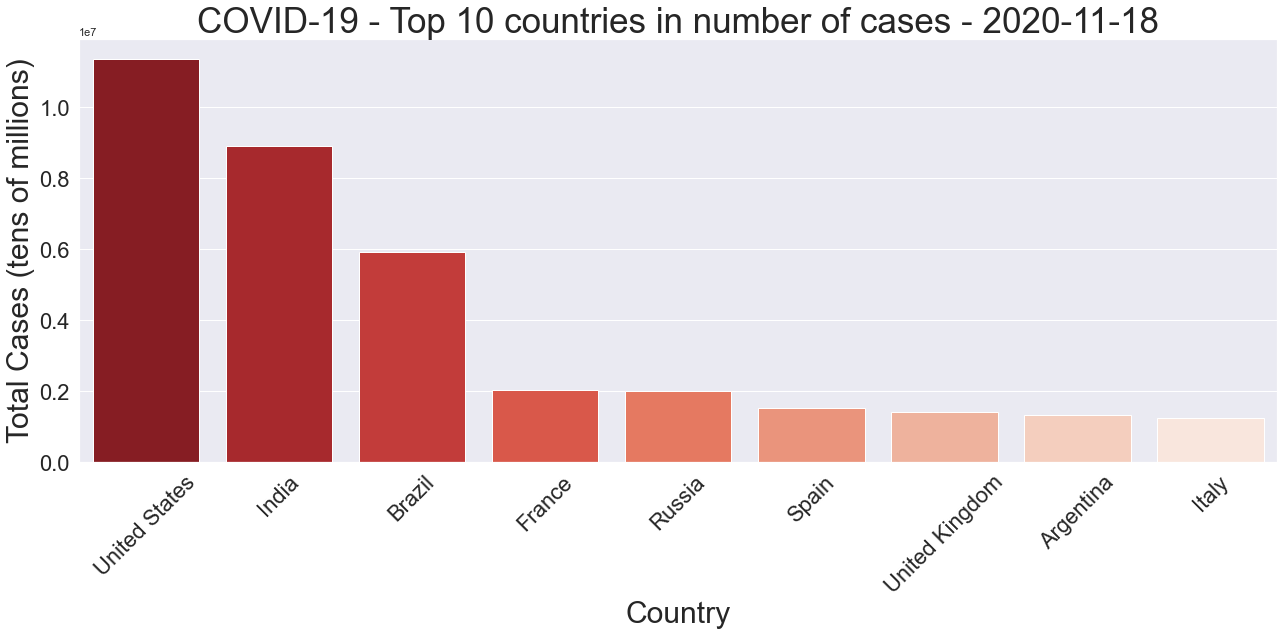

In [154]:
plot_fig('location', 'total_cases', top_cases, f'COVID-19 - Top {top_N} countries in number of cases - {today}', 'Country', 
         'Total Cases (tens of millions)', output_file_name='covid_top_cases.png')

In [46]:
print(f"Percentage of cases from the top {top_N} countries on the total number: {top_cases['total_cases'].sum() / world_cases:.2%}")

Percentage of cases from the top 10 countries on the total number: 63.51%


## A Look at the countries with the most cases per million people

A cutoff of at least 10M is imposed, since many small countries have huge case/death rates per million residents, but this is more of a statistical issue due to the small sample size than an indication that those countries
are truly fareing very badly. For example 7/10 coins flipping heads may not indicate your coin is unfair, whereas 7000/10000 heads would.

In [156]:
# top  countries - cases per millions
top_cases_per_m = df.loc[(df['date'] == today) & (df['population'] > 11000000), ['location', 'population', 'total_cases_per_million']].sort_values(by='total_cases_per_million', ascending=False)[0:top_N+1].reset_index(drop=True)
pd.set_option('float_format', '{:,}'.format)
#print(top_cases_per_m.to_markdown())
top_cases_per_m

,location,population,total_cases_per_million
0,United States,"331,002,647.0","34,319.369"
1,Spain,"46,754,783.0","32,624.277000000002"
2,France,"65,273,512.0","31,203.392000000003"
3,Argentina,"45,195,777.0","29,405.225"
4,Peru,"32,971,846.0","28,507.077999999998"
5,Chile,"19,116,209.0","27,914.007"
6,Brazil,"212,559,409.0","27,812.262000000002"
7,Netherlands,"17,134,873.0","26,638.832000000002"
8,Colombia,"50,882,884.0","23,802.267000000003"
9,United Kingdom,"67,886,004.0","20,780.896"


(<Figure size 1296x648 with 1 Axes>,
 <AxesSubplot:title={'center':'COVID-19 - Top 10 countries in number of cases per million- 2020-11-18'}, xlabel='Country', ylabel='Total Cases per million'>)

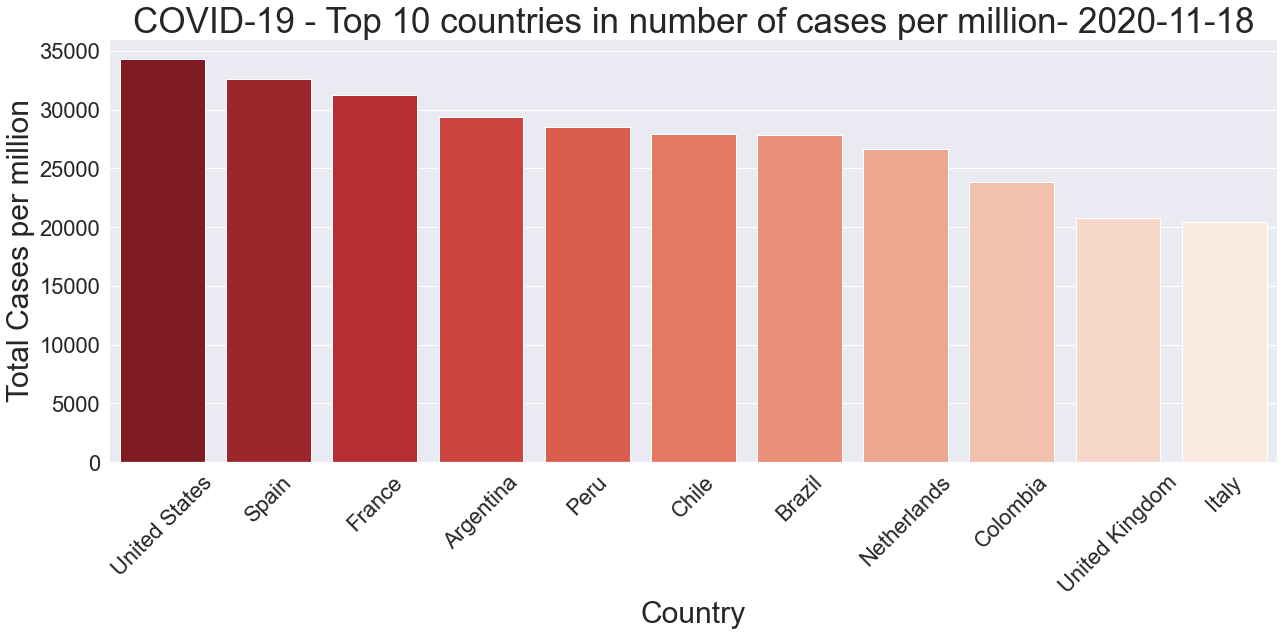

In [157]:
plot_fig('location', 'total_cases_per_million', top_cases_per_m, f'COVID-19 - Top {top_N} countries in number of cases per million- {today}', 'Country', 
         'Total Cases per million', output_file_name='covid_cases_per_million.png')

## A Look at the countries with the most deaths

In [91]:
# top countries - deaths
top_deaths = df.loc[df['date'] == today, ['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[1:top_N+1].reset_index(drop=True)
top_deaths

,location,total_deaths
0,United States,"248,687.0"
1,Brazil,"166,699.0"
2,India,"130,993.0"
3,Mexico,"99,026.0"
4,United Kingdom,"52,745.0"
5,Italy,"46,464.0"
6,France,"46,273.0"
7,Iran,"42,461.0"
8,Spain,"42,039.0"
9,Argentina,"36,106.0"


(<Figure size 1296x648 with 1 Axes>,
 <AxesSubplot:title={'center':'COVID-19 - Top 10 countries in number of deaths - 2020-11-18'}, xlabel='Country', ylabel='Total deaths'>)

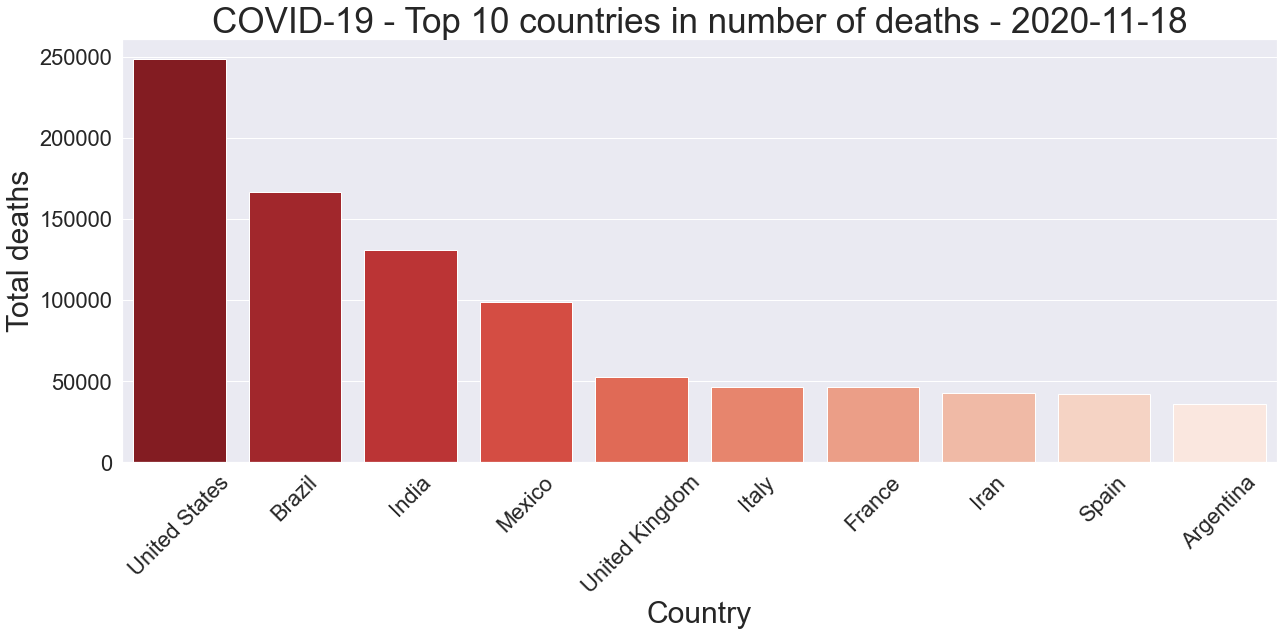

In [159]:
plot_fig('location', 'total_deaths', top_deaths, f'COVID-19 - Top {top_N} countries in number of deaths - {today}', 'Country', 
         'Total deaths')

## A Look at the countries with the most deaths per million

Notice it can be dangerous to use today for this, as on 2020-11-19 there is no entry for Spain at all yet, and it would be missing from the top deaths per million plot, despite being one of the highest ranking countries
by that measure!

In [160]:
top_deaths_per_m_df = df.loc[(df['date'] == '2020-11-19') & (df['population'] > 10000000), ['location', 'population', 'total_deaths_per_million']]
top_deaths_per_m_df[top_deaths_per_m_df['location'] == 'Spain']

,location,population,total_deaths_per_million


In [161]:
# We need to group by location and get the lastest entry we have for that country
top_deaths_per_m = df[(df['total_deaths_per_million'].isnull() == False) & (df['population'] > 10000000)]
top_deaths_per_m = top_deaths_per_m.loc[top_deaths_per_m.groupby('location').date.idxmax()]

top_deaths_per_m = top_deaths_per_m[['location', 'date', 'total_deaths_per_million']].sort_values(by='total_deaths_per_million', ascending=False)[0:top_N].reset_index(drop=True)
top_deaths_per_m

# Once again we exclude small population countries when looking at per million metrics and we exclude rows were this total_tests_per_million is lacking
#df_tests = df[(df['total_tests_per_thousand'].isnull() == False) & (df['population'] > 10000000) ]
# We want the latest non-null tests data by location (diff per location) so we groupby location and get the max date from our nonnull cols
#df_tests_per_k = df_tests.loc[df_tests.groupby('location').date.idxmax()][['location', 'date', 'total_tests_per_thousand']]

,location,date,total_deaths_per_million
0,Belgium,2020-11-17,"1,284.684"
1,Peru,2020-11-19,"1,073.704"
2,Spain,2020-11-18,899.138
3,Argentina,2020-11-19,804.212
4,Brazil,2020-11-19,787.803
5,United Kingdom,2020-11-19,784.757
6,Italy,2020-11-19,780.939
7,Chile,2020-11-19,779.2860000000001
8,Mexico,2020-11-19,771.937
9,Bolivia,2020-11-19,760.3


(<Figure size 1296x648 with 1 Axes>,
 <AxesSubplot:title={'center':'COVID-19 - Top countries in number of deaths per million - 2020-11-18'}, xlabel='Country', ylabel='Total deaths per million'>)

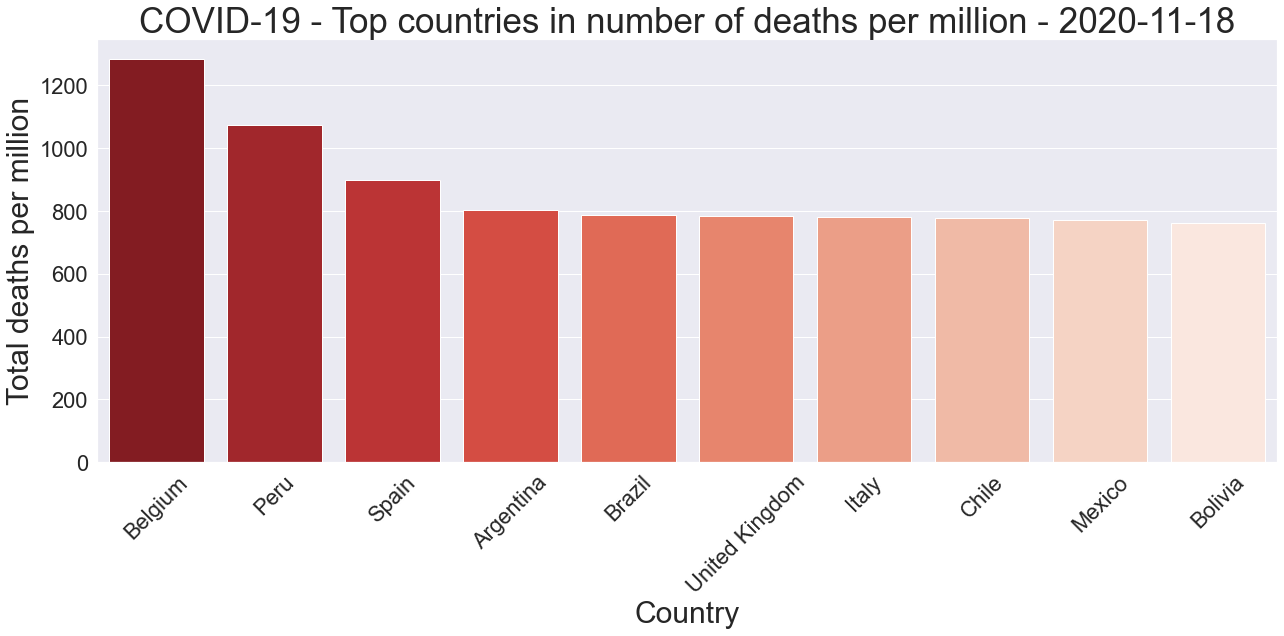

In [162]:
plot_fig('location', 'total_deaths_per_million', top_deaths_per_m, f'COVID-19 - Top countries in number of deaths per million - {today}', 'Country', 
         'Total deaths per million', output_file_name='covid_deaths_per_million.png')

In [71]:
world_deaths = df[(df['date'] == today) &  (df['location']=='World')].iloc[0]['total_deaths']
world_deaths

1340039.0

In [72]:
top_deaths_sum = df.loc[(df['date'] == today), ['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[1:top_N+1]['total_deaths'].sum()
top_deaths_sum

911493.0

In [73]:
print(f'We have {world_deaths:,} worldwide deaths from of COVID on {today}. And {100*top_deaths_sum/world_deaths: .2f}% came from the {top_N} countries')

We have 1,340,039.0 worldwide deaths from of COVID on 2020-11-18. And  68.02% came from the 10 countries


# What countries did the most testing for Covid-19?

So even though Brazil came out not so badly in terms of cases per million, it doesn't stack up quite so well in terms of deaths per million.
Could the differences be explained by lack of testing?

In [97]:
# Once again we exclude small population countries when looking at per million metrics and we exclude rows were this total_tests_per_million is lacking
df_tests = df[(df['total_tests_per_thousand'].isnull() == False) & (df['population'] > 10000000) ]
# We want the latest non-null tests data by location (diff per location) so we groupby location and get the max date from our nonnull cols
df_tests_per_k = df_tests.loc[df_tests.groupby('location').date.idxmax()][['location', 'date', 'total_tests_per_thousand']]

df_tests_per_k = df_tests_per_k.sort_values(by='total_tests_per_thousand', ascending=False)[0:top_N].reset_index(drop=True)
df_tests_per_k
# print(df_tests_per_k.to_markdown())

,location,date,total_tests_per_thousand
0,United States,2020-11-13,501.625
1,United Kingdom,2020-11-16,499.755
2,Russia,2020-11-17,480.18699999999995
3,Belgium,2020-11-16,476.344
4,Portugal,2020-11-15,395.52
5,Australia,2020-11-17,370.251
6,Spain,2020-11-05,321.32099999999997
7,Italy,2020-11-17,318.209
8,Germany,2020-11-08,298.51099999999997
9,Canada,2020-11-17,277.223


(<Figure size 1296x648 with 1 Axes>,
 <AxesSubplot:title={'center':'COVID-19 - Top countries in number of tests per thousand - 2020-11-18'}, xlabel='Country', ylabel='Total tests per thousand'>)

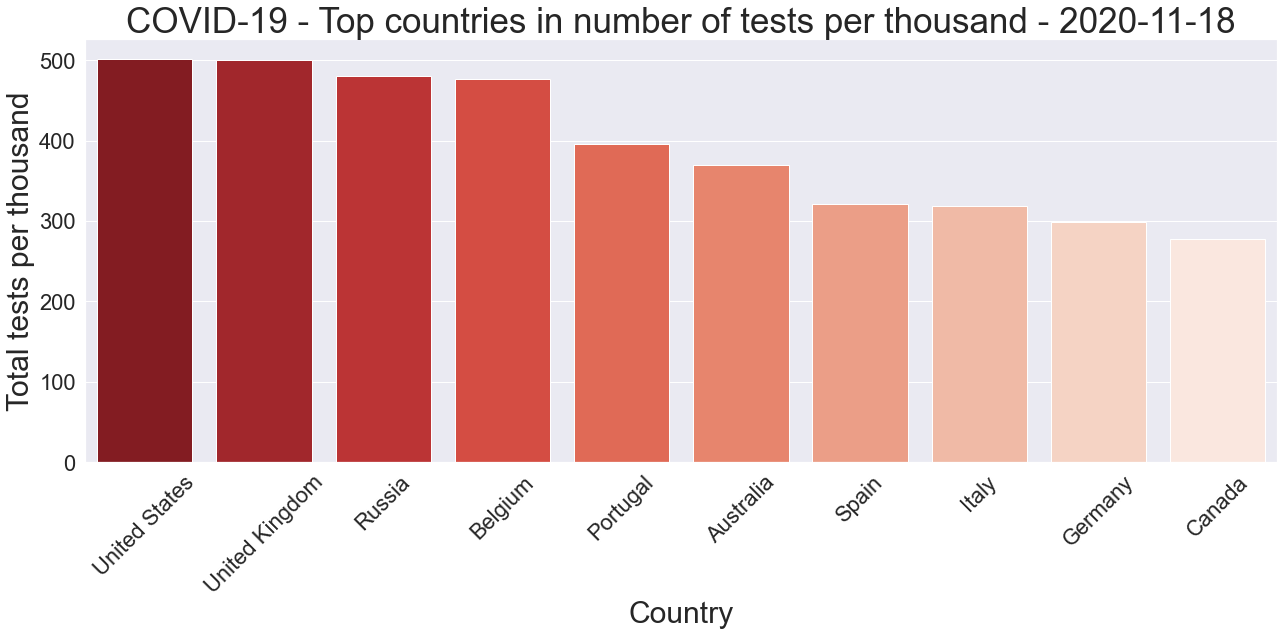

In [163]:
plot_fig('location', 'total_tests_per_thousand', df_tests_per_k, f'COVID-19 - Top countries in number of tests per thousand - {today}', 'Country', 
         'Total tests per thousand', output_file_name='covid_tests_per_thousand.png')

We see that the US, UK and Russia are leading the world in terms of testing done.

## Trump testing fact check

Trump claimed on the 12 May that the US had done more testing than any other country.

In [234]:
total_tests_df = df[(df['date'] < '2020-05-12') & (df['total_tests'].isnull() == False)][['location', 'date', 'total_tests']]
most_recent_total_tests_df = total_tests_df.loc[total_tests_df.groupby('location').date.idxmax()]

In [235]:
most_recent_total_tests_df.sort_values(by='total_tests', ascending=False).reset_index(drop=True)[0: top_N]

,location,date,total_tests
0,United States,2020-05-11,"10,505,135.0"
1,Russia,2020-05-11,"5,805,404.0"
2,Germany,2020-05-10,"3,167,462.0"
3,Italy,2020-05-11,"2,606,652.0"
4,United Kingdom,2020-05-11,"1,710,628.0"
5,India,2020-05-11,"1,673,688.0"
6,Spain,2020-05-07,"1,625,211.0"
7,United Arab Emirates,2020-05-11,"1,476,117.0"
8,Turkey,2020-05-11,"1,403,320.0"
9,Canada,2020-05-11,"1,121,629.0"


This was true. The US had done over 10M tests, almost double the next country Russia, which had done nearly nearly 6M

In [231]:
most_recent_total_tests_df[most_recent_total_tests_df['location'] != 'United States']['total_tests'].sum()

35043187.0

However the rest of the world combinated had done 35M

# Rise of COVID

## Here the rise of covid cases is studied for the countries with the most total cases

In [126]:
top_evo_cases = df.copy()
top_5_cases_country_names = list(top_cases.iloc[:5]['location'].values)
top_evo_cases.set_index('location', inplace = True)
top_evo_cases = top_evo_cases.loc[top_5_cases_country_names]
top_evo_cases = top_evo_cases.reset_index()

(<Figure size 1296x648 with 1 Axes>,
 <AxesSubplot:title={'center':'COVID-19 - Total of cases per country over time - 2020-11-18'}, xlabel='Date', ylabel='Number of Cases (tens of millions)'>)

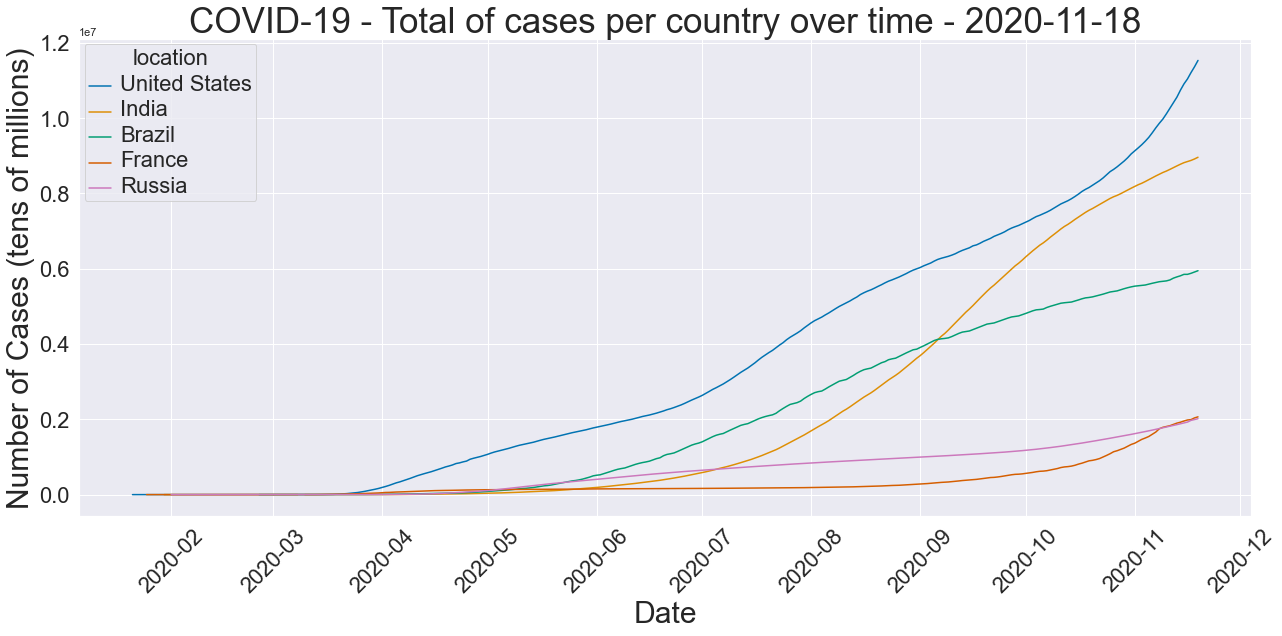

In [164]:
plot_fig('date', 'total_cases', top_evo_cases, f'COVID-19 - Total of cases per country over time - {today}', 'Date', 
         'Number of Cases (tens of millions)', plot_type='line', hue='location', palette='colorblind', output_file_name='covid_evo_cases.png')

The number of cases starting increasing around mid to late March for the US, with upsticks around July and again in October, showing no sign of levelling off.

For a while Brazil was the country with the 2nd highest number of cases, until it was overtaken by India in early September. 

## Here the rise of covid cases is studied for the countries with the most total deaths

(<Figure size 1296x648 with 1 Axes>,
 <AxesSubplot:title={'center':'COVID-19 - Total of deaths per country over time - 2020-11-18'}, xlabel='Date', ylabel='Number of Deaths'>)

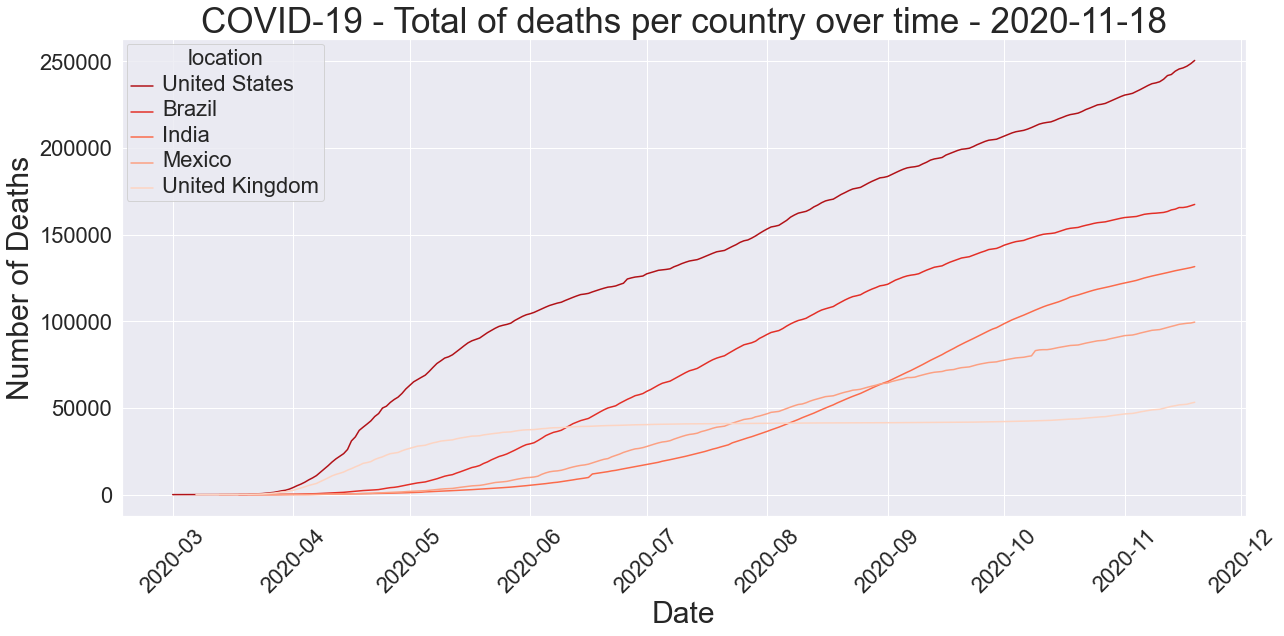

In [165]:
top_evo_death = df.copy()
top_deaths_country_names = list(top_deaths.iloc[:5]['location'].values)

top_evo_death.set_index('location', inplace = True)
top_evo_death = top_evo_death.loc[top_deaths_country_names]
top_evo_death = top_evo_death.reset_index()

plot_fig('date', 'total_deaths', top_evo_death, f'COVID-19 - Total of deaths per country over time - {today}', 'Date', 
         'Number of Deaths', plot_type='line', hue='location', output_file_name='covid_evo_deaths.png')

The US also leads the world in total death count. There the death count has been rising since mid to late March and seems to show no sign of flattening out. Brazil despite now having less cases than India, still leads India in terms of total deaths.

The UK had an initial sharp rise in death count, but appeared to flatten out around late May, however in November it looks like the total death count is once again on the rise.

## Here the rise of covid cases is studied for the countries with the most total deaths per million

(<Figure size 1296x648 with 1 Axes>,
 <AxesSubplot:title={'center':'COVID-19 - Total of deaths per country per million over time - 2020-11-18'}, xlabel='Date', ylabel='Number of Deaths per million'>)

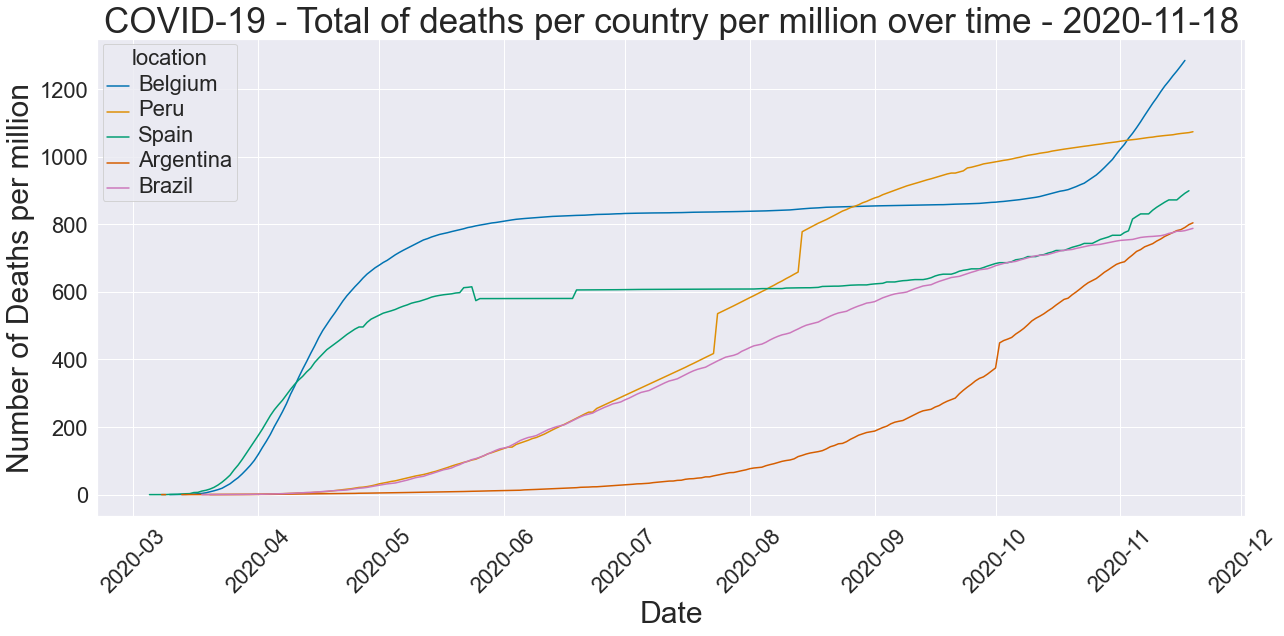

In [166]:
top_evo_death_per_m = df.copy()
top_deaths_country_names = list(top_deaths_per_m.iloc[:5]['location'].values)

top_evo_death_per_m.set_index('location', inplace = True)
top_evo_death_per_m = top_evo_death_per_m.loc[top_deaths_country_names]
top_evo_death_per_m = top_evo_death_per_m.reset_index()

plot_fig('date', 'total_deaths_per_million', top_evo_death_per_m, f'COVID-19 - Total of deaths per country per million over time - {today}', 'Date', 
         'Number of Deaths per million', plot_type='line', hue='location', palette='colorblind', output_file_name='covid_evo_deaths_per_million.png')

Argentina seems to have come late to the party. We can see Italy went sharply into the lead but then flattened until recently. Argentina however was slow to see a rise in deaths, but since around August it seems their death count has grown rapidly to now take it into the lead in terms of deaths per million

# A look at how lockdowns affect the rise of daily deaths with a particular focus on the UK lockdowns

In [167]:
# Data for just the UK
df_uk = df.loc[df['location'] == 'United Kingdom'].copy()
df_uk.set_index('date', inplace=True)

In [168]:
df_uk.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,GBR,Europe,United Kingdom,nan,0.0,nan,nan,0.0,nan,nan,...,"39,753.244",0.2,122.137,4.28,20.0,24.7,nan,2.54,81.32,0.922
2020-01-01,GBR,Europe,United Kingdom,nan,0.0,nan,nan,0.0,nan,nan,...,"39,753.244",0.2,122.137,4.28,20.0,24.7,nan,2.54,81.32,0.922
2020-01-02,GBR,Europe,United Kingdom,nan,0.0,nan,nan,0.0,nan,nan,...,"39,753.244",0.2,122.137,4.28,20.0,24.7,nan,2.54,81.32,0.922
2020-01-03,GBR,Europe,United Kingdom,nan,0.0,nan,nan,0.0,nan,nan,...,"39,753.244",0.2,122.137,4.28,20.0,24.7,nan,2.54,81.32,0.922
2020-01-04,GBR,Europe,United Kingdom,nan,0.0,nan,nan,0.0,nan,nan,...,"39,753.244",0.2,122.137,4.28,20.0,24.7,nan,2.54,81.32,0.922


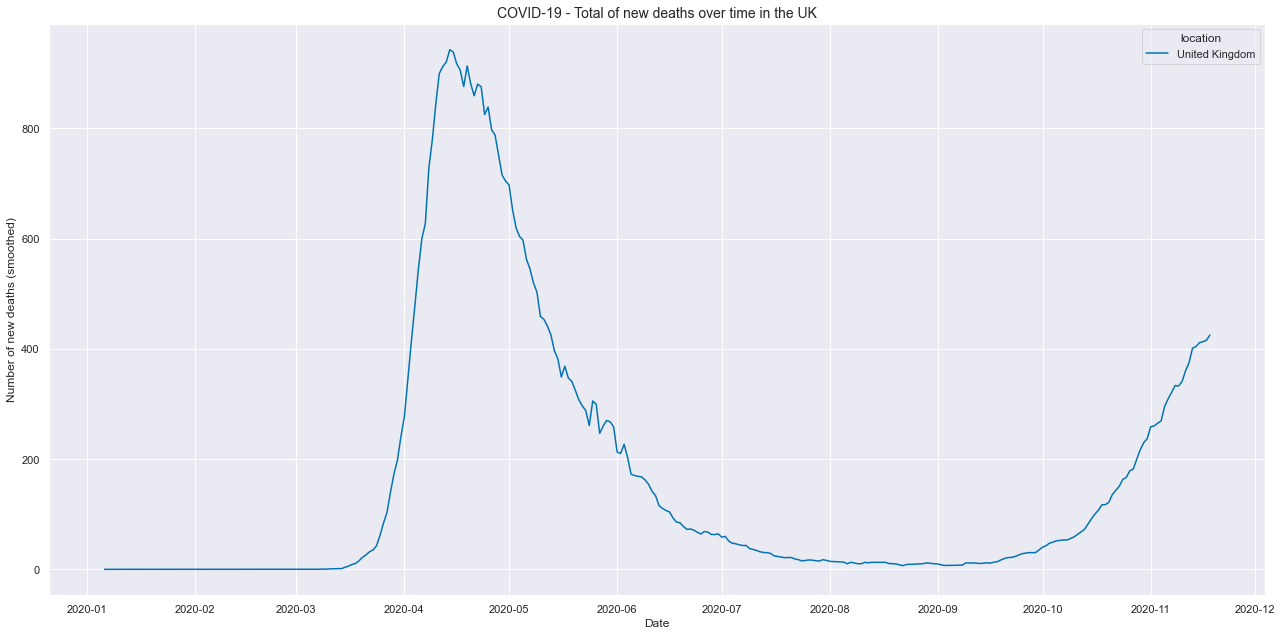

In [102]:
plot_fig('date', 'new_deaths_smoothed', df_uk, f'COVID-19 - Total of new deaths over time in the UK', 'Date', 
         'Number of new deaths (smoothed)', plot_type='line', hue='location')

The first wave and the beginning of the second wave around the start of October can clearly be observed in the UK.

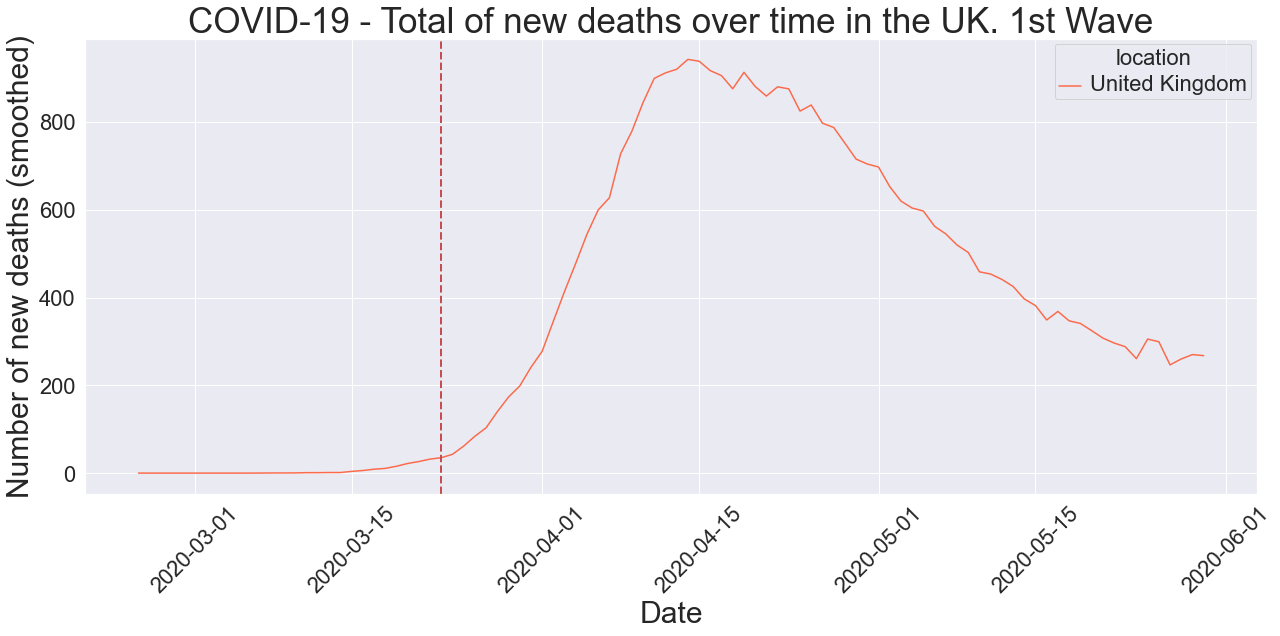

In [170]:
fig, ax = plot_fig('date', 'new_deaths_smoothed', df_uk.loc['2020-02-25':'2020-05-30'], f'COVID-19 - Total of new deaths over time in the UK. 1st Wave', 'Date', 
                   'Number of new deaths (smoothed)', plot_type='line', hue='location')
# Date of 1st UK lockdown
ax.axvline(pd.to_datetime('2020-03-23'), color='r', linestyle='--', lw=2)
plt.savefig('uk_lockdowns_1st_deaths.png')

We can see the the lockdown date on the 23rd of March 2020, and approx 2-3 weeks later the daily new deaths rate beginning to slow down and then reduce.

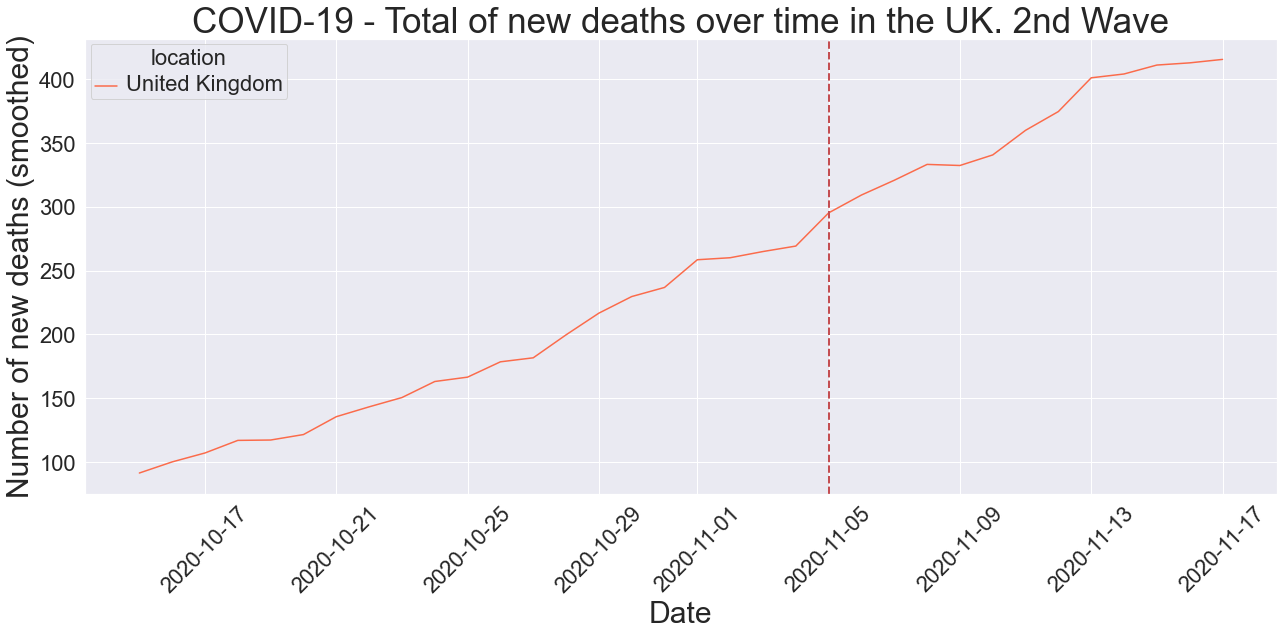

In [171]:
fig, ax = plot_fig('date', 'new_deaths_smoothed',df_uk.loc['2020-10-15':'2020-11-17'], f'COVID-19 - Total of new deaths over time in the UK. 2nd Wave', 'Date', 
                   'Number of new deaths (smoothed)', plot_type='line', hue='location')
# Date of the 2nd UK lockdown
ax.axvline(pd.to_datetime('2020-11-05'), color='r', linestyle='--', lw=2)
plt.savefig('uk_lockdowns_2_deaths.png')

This figure shows the data of the 2nd UK lockdown on the 5th of Nov. At least so far 12 days later, we don't really seem to see a slow down in the daily new deaths

# A closer look at the lag between cases and death rates with a focus on Brazil

Brazil has been something of an exception to most countries in the world. President Bolsonero is not a fan of lockdowns and the policy in Brazil was much more relaxed than
most countries around the globe. Borders reopened around July and tourism has been allowed since that time.

In [130]:
# Data for just Brazil
df_brazil = df.loc[df['location'] == 'Brazil'].copy()
df_brazil.set_index('date', inplace=True)

In [131]:
df_brazil.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,BRA,South America,Brazil,nan,0.0,nan,nan,0.0,nan,nan,...,"14,103.452",3.4,177.96099999999998,8.11,10.1,17.9,nan,2.2,75.88,0.759
2020-01-01,BRA,South America,Brazil,nan,0.0,nan,nan,0.0,nan,nan,...,"14,103.452",3.4,177.96099999999998,8.11,10.1,17.9,nan,2.2,75.88,0.759
2020-01-02,BRA,South America,Brazil,nan,0.0,nan,nan,0.0,nan,nan,...,"14,103.452",3.4,177.96099999999998,8.11,10.1,17.9,nan,2.2,75.88,0.759
2020-01-03,BRA,South America,Brazil,nan,0.0,nan,nan,0.0,nan,nan,...,"14,103.452",3.4,177.96099999999998,8.11,10.1,17.9,nan,2.2,75.88,0.759
2020-01-04,BRA,South America,Brazil,nan,0.0,nan,nan,0.0,nan,nan,...,"14,103.452",3.4,177.96099999999998,8.11,10.1,17.9,nan,2.2,75.88,0.759


In [109]:
# When did Brazil record a first case?
first_case_br = df_brazil.loc[df_brazil['total_cases'] == 1, ['total_cases']].sort_values(by='date').head(1)
first_case_br

,total_cases
date,
2020-02-26,1.0


In [110]:
# When did it record a first death?
first_death_br = df_brazil.loc[df_brazil['total_deaths'] == 1, ['total_deaths']].sort_values(by='date').head(1)
first_death_br

,total_deaths
date,
2020-03-18,1.0


## Here we check the lag between cases reported and total deaths for Brazil

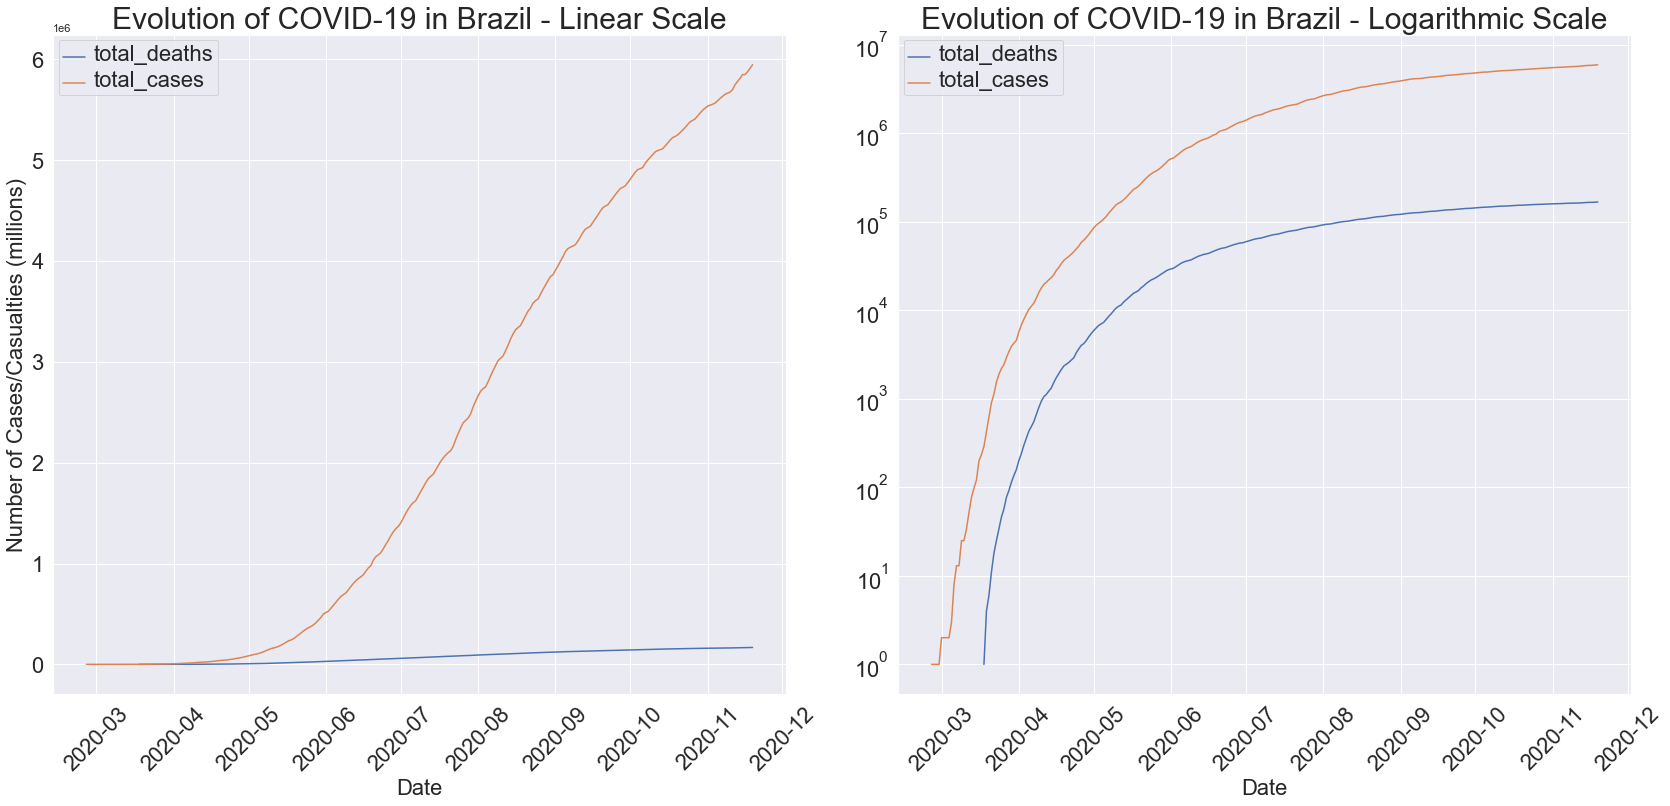

In [148]:
# create the matplotlib figure instance
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 12))

# linear scale
ax[0].plot('total_deaths', data=df_brazil)
ax[0].plot('total_cases', data=df_brazil)
ax[0].set_title('Evolution of COVID-19 in Brazil - Linear Scale', fontsize=30)
ax[0].set_xlabel('Date', fontsize=22)
ax[0].set_ylabel('Number of Cases/Casualties (millions)', fontsize=22)
ax[0].legend()



# logarithmic scale
plt.yscale('log')
ax[1].plot('total_deaths', data=df_brazil)
ax[1].plot('total_cases', data=df_brazil)
ax[1].set_title('Evolution of COVID-19 in Brazil - Logarithmic Scale', fontsize=30)
ax[1].set_xlabel('Date', fontsize=22)
ax[1].legend()


plt.setp(ax[0].get_legend().get_texts(), fontsize='22') # for legend text
plt.setp(ax[1].get_legend().get_texts(), fontsize='22') # for legend text
# We change the fontsize of minor ticks label 
ax[0].tick_params(axis='both', which='major', labelsize=22)
ax[1].tick_params(axis='both', which='major', labelsize=22)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
    plt.tight_layout(pad=3.0)



plt.savefig('brazil_case_death_lag.png')

We see that there is a lag between total cases and total deaths that appears to be around 2 weeks

# Economic impact

The data to measure the economic impact was obtained from OECD.stat OECD's quarterly national accounts data, available at [OECD.stat] (https://stats.oecd.org/Index.aspx?DatasetCode=SNA_TABLE1#)

We will compute the percentage change in GDP compared with the same quarter of the previous year (Q2 2019)

In [172]:
df2 = pd.read_csv('./data/QNA_16112020232419872.csv')

/home/jim/Desktop/Jupyter Projs/virtualenvs/coronavenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Data understanding

In [173]:
df2.head()

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Period,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,JPN,Japan,GFSPB,Public sector,CARSA,"National currency, current prices, annual leve...",Q,Quarterly,2017-Q4,Q4-2017,JPY,Yen,6,Millions,NaN,NaN,"27,492,200.0",NaN,NaN
1,JPN,Japan,GFSPB,Public sector,CARSA,"National currency, current prices, annual leve...",Q,Quarterly,2018-Q1,Q1-2018,JPY,Yen,6,Millions,NaN,NaN,"27,715,100.0",NaN,NaN
2,JPN,Japan,GFSPB,Public sector,CARSA,"National currency, current prices, annual leve...",Q,Quarterly,2018-Q2,Q2-2018,JPY,Yen,6,Millions,NaN,NaN,"28,686,300.0",NaN,NaN
3,JPN,Japan,GFSPB,Public sector,CARSA,"National currency, current prices, annual leve...",Q,Quarterly,2018-Q3,Q3-2018,JPY,Yen,6,Millions,NaN,NaN,"28,041,800.0",NaN,NaN
4,JPN,Japan,GFSPB,Public sector,CARSA,"National currency, current prices, annual leve...",Q,Quarterly,2018-Q4,Q4-2018,JPY,Yen,6,Millions,NaN,NaN,"27,811,100.0",NaN,NaN


In [174]:
df2.dtypes

LOCATION                  object
Country                   object
SUBJECT                   object
Subject                   object
MEASURE                   object
Measure                   object
FREQUENCY                 object
Frequency                 object
TIME                      object
Period                    object
Unit Code                 object
Unit                      object
PowerCode Code             int64
PowerCode                 object
Reference Period Code     object
Reference Period          object
Value                    float64
Flag Codes                object
Flags                     object
dtype: object

Here the "B1_GA" is the GDP measured by the "output approach" to calculate GDP. It sums the gross value added of various sectors, plus taxes and less subsidies on products.

We can investigate how much data we have for each of the different measures:

In [175]:
df2[df2['Period'].isin(['Q2-2019', 'Q2-2020'])]['MEASURE'].value_counts()

CQR           8436
CQRSA         7318
LNBQRSA       4119
LNBQR         3945
PER           2841
PERSA         2353
HRS           2248
HRSSA         2032
CARSA         1094
DNBSA          706
VOBARSA        674
VPVOBARSA      655
CPCARSA        654
DOBSA          639
VIXOBSA        639
GYSA           632
GPSA           632
VNBQR          436
LNBARSA        291
VNBQRSA        260
CAR            247
VNBARSA        162
CTQRGPSA       155
VNBAR          150
CD             100
HCPCARSA        90
HVPVOBARSA      90
VIXNBSA         42
VIXNB           18
Name: MEASURE, dtype: int64

How much of data we have for the periods of interest for the different subjects:

In [121]:
df2[df2['Period'].isin(['Q2-2019', 'Q2-2020'])]['SUBJECT'].value_counts()[:50]

B1_GE          1534
P6             1338
P7             1338
P31S14_S15     1336
P3S13          1334
P51            1334
RB1_GE          531
P3              500
P5              480
B11             402
P62             368
P72             368
P71             368
P61             368
P51A            363
B1_GA           346
B1GVA           332
B1G             332
B1GVC           332
P51N1111        331
B1GVB_E         330
B1GVO_Q         328
B1GVF           328
B1GVG_I         326
D21_D31         320
B1GVL           320
B1GVJ           320
B1GVK           319
P31DC           317
P51N1112        316
P51N1113        315
P311B           312
B1GVR_U         308
B1GVM_N         305
B1GVG_U         302
P51N112         301
P31S14          300
P31S15          298
P51N11131       291
P3_P5           286
P31S14_S15B     286
P312N           274
P51N1114        266
RB1_GA          262
P52_P53         262
EEM             253
ETO             251
ETOVO_Q         250
P41             250
ETOVL           250


## Data cleanup/filtering

**For each country compare the Q2 2020 with the Q2 of 2019 to measure the economic impact of COVID**

Euro zone will be excluded, and we will filter down the B1_GA, the periods of interest and the CQR measure as it is the measure we have the most data for over the period of interest

In [176]:
fdf = df2[(df2['Country'].str.contains('Euro') == False) & (df2['SUBJECT'] == 'B1_GA')  & (df2['Period'].isin(['Q2-2019', 'Q2-2020'])) &  (df2['MEASURE'] == 'CQR')]
fdf.head()

,LOCATION,Country,SUBJECT,Subject,MEASURE,Measure,FREQUENCY,Frequency,TIME,Period,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
454,AUT,Austria,B1_GA,Gross domestic product at market prices - outp...,CQR,"National currency, current prices, quarterly l...",Q,Quarterly,2019-Q2,Q2-2019,EUR,Euro,6,Millions,NaN,NaN,"98,844.8",NaN,NaN
458,AUT,Austria,B1_GA,Gross domestic product at market prices - outp...,CQR,"National currency, current prices, quarterly l...",Q,Quarterly,2020-Q2,Q2-2020,EUR,Euro,6,Millions,NaN,NaN,"85,938.3",NaN,NaN
499,BEL,Belgium,B1_GA,Gross domestic product at market prices - outp...,CQR,"National currency, current prices, quarterly l...",Q,Quarterly,2019-Q2,Q2-2019,EUR,Euro,6,Millions,NaN,NaN,"120,178.0",NaN,NaN
503,BEL,Belgium,B1_GA,Gross domestic product at market prices - outp...,CQR,"National currency, current prices, quarterly l...",Q,Quarterly,2020-Q2,Q2-2020,EUR,Euro,6,Millions,NaN,NaN,"103,698.0",P,Provisional value
565,CZE,Czech Republic,B1_GA,Gross domestic product at market prices - outp...,CQR,"National currency, current prices, quarterly l...",Q,Quarterly,2019-Q2,Q2-2019,CZK,Czech Koruna,6,Millions,NaN,NaN,"1,440,896.0",NaN,NaN


In [177]:
# I need to take the difference between the 2 quarters for a given country
fdf = fdf.set_index(['Country', 'Period'])

In [178]:
data = []
for country in fdf.index.levels[0]:
    diff_q2 = (100*(fdf.loc[country].loc['Q2-2020']['Value'] - fdf.loc[country].loc['Q2-2019']['Value'])/fdf.loc[country].loc['Q2-2019']['Value'])
    data.append([country, diff_q2])
    
ec_df = pd.DataFrame(data, columns=['country', 'gdp_diff_q2']).sort_values(by='gdp_diff_q2', ascending=False)

In [179]:
ec_df.head()

,country,gdp_diff_q2
5,China (People's Republic of),3.1068070830402954
38,Turkey,1.2807956206018996
20,Korea,-1.5792434784239446
18,Ireland,-2.5102760008430383
23,Luxembourg,-3.8674452111928415


# Which countries suffered the most economic impact due to the first wave of Covid 19?

(<Figure size 1296x1296 with 1 Axes>,
 <AxesSubplot:title={'center':'COVID-19 - Econonomic impact per country (GDP in Q2 of 2020/2019)'}, xlabel='GDP Difference (%)', ylabel='Country'>)

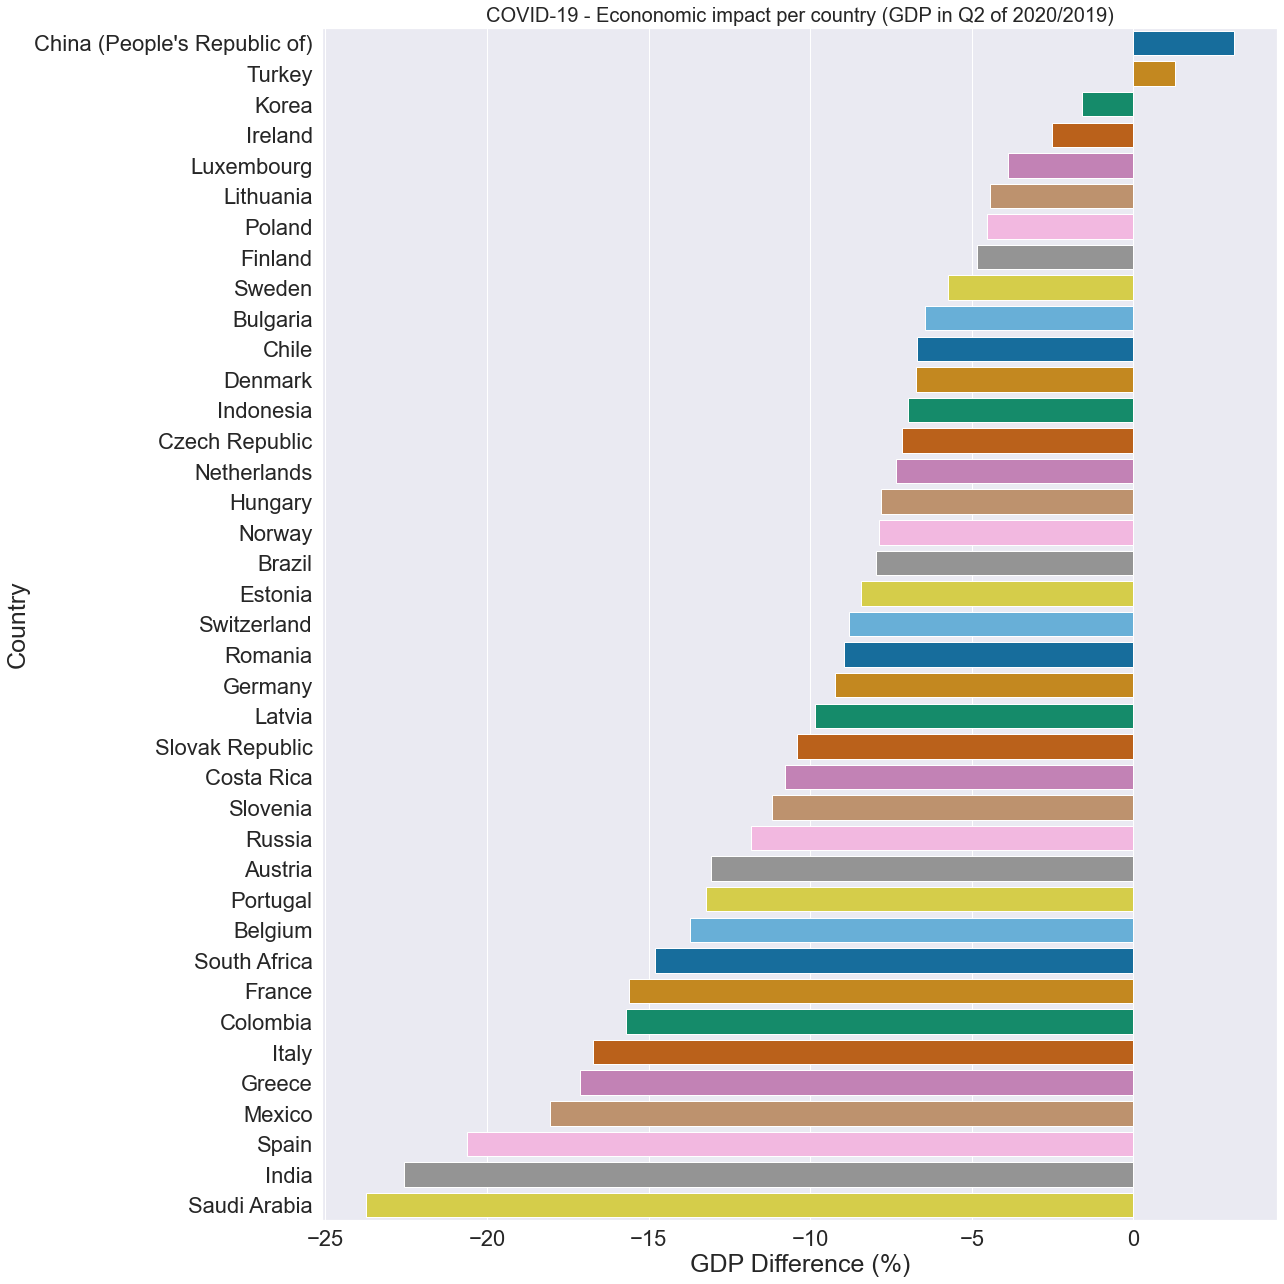

In [186]:
plot_fig('gdp_diff_q2', 'country', ec_df, 'COVID-19 - Econonomic impact per country (GDP in Q2 of 2020/2019)', 'GDP Difference (%)', 
         'Country', x_figsize=18, y_figsize=18, palette='colorblind', output_file_name='graph_econ_impact.png', xtick_rot=0, title_fontsize=20)

We see that China and Turkey did not seem to suffer. Unsurprisngly, perhaps countries known to be hit hardest and earliest like Spain, Italy, France in Europe took a hit in that quarter. It seems also that Saudi Arabia 
suffered economically. Could this be to lockdowns reducing the demand for oil? or is it just some artefact of the measure being used here to quantify economic impact?

# Sweden in relation to the rest of Scandinavia

Sweden had a much less stringent lockdown that its neighbours. Let's see in more detail how it fared in economic terms and also how covid progressed there.

In [189]:
scandi_names = ['Sweden', 'Denmark', 'Norway', 'Finland']

## In econonomic terms

In [190]:
scandi_df = ec_df[ec_df['country'].isin(scandi_names)].sort_values(by='gdp_diff_q2', ascending=False)

(<Figure size 1080x504 with 1 Axes>,
 <AxesSubplot:title={'center':'COVID-19 - Econonomic impact per country in Scandinavia (GDP in Q2 of 2020/2019)'}, xlabel='GDP Difference Q2 2020 compared to Q2 2019', ylabel='Country'>)

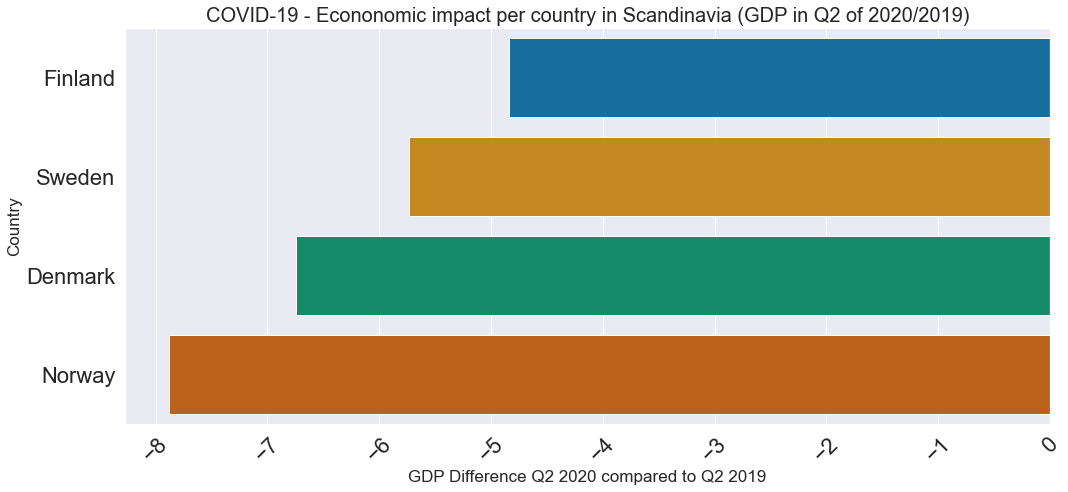

In [201]:
plot_fig('gdp_diff_q2', 'country', scandi_df, 'COVID-19 - Econonomic impact per country in Scandinavia (GDP in Q2 of 2020/2019)', 'GDP Difference Q2 2020 compared to Q2 2019', 
         'Country', x_figsize=15, y_figsize=7, palette='colorblind', output_file_name='scandi_econ_impact.png', title_fontsize=20, xlabel_fontsize=17, ylabel_fontsize=17)

It seems the Swedish economy fared better than that of Denmark and Norway but not as well as that of Finland

## In terms of cases over time

In [203]:
scandi_df = df.copy()
scandi_df.set_index('location', inplace = True)
scandi_df = scandi_df.loc[scandi_names]
scandi_df = scandi_df.reset_index()

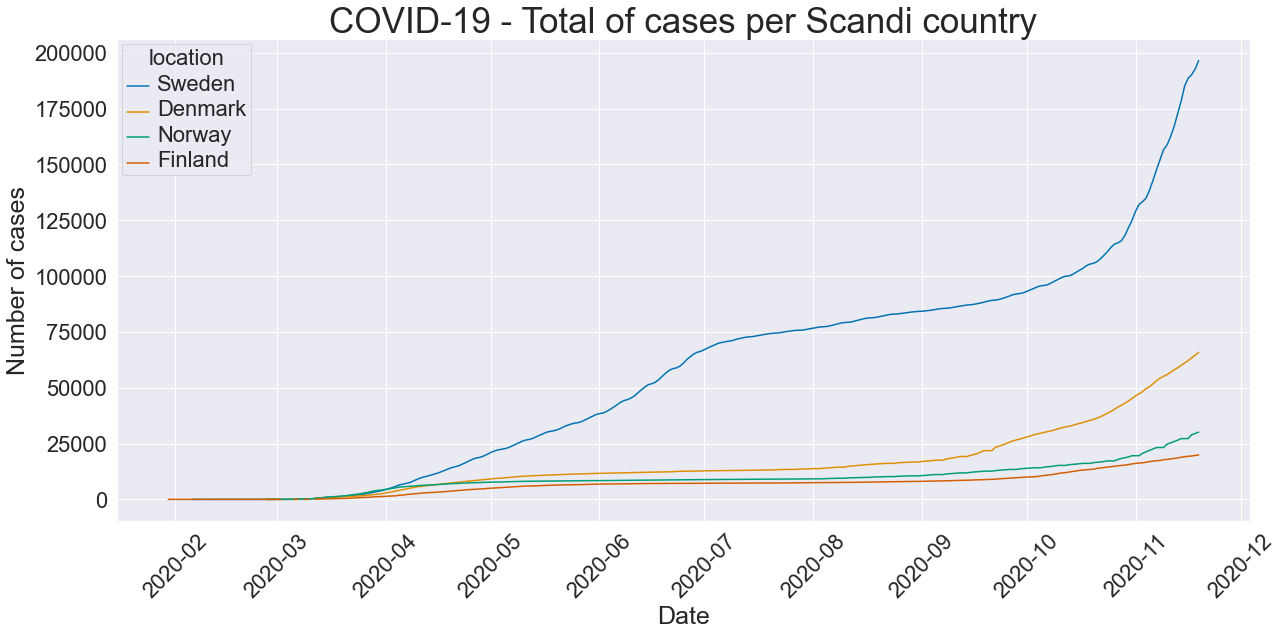

In [204]:
fig, ax = plot_fig('date', 'total_cases', scandi_df , 'COVID-19 - Total of cases per Scandi country', 
                   'Date', 'Number of cases', plot_type='line', hue='location', palette='colorblind', output_file_name='scandi_cases.png')

## In terms of cases per million of the population

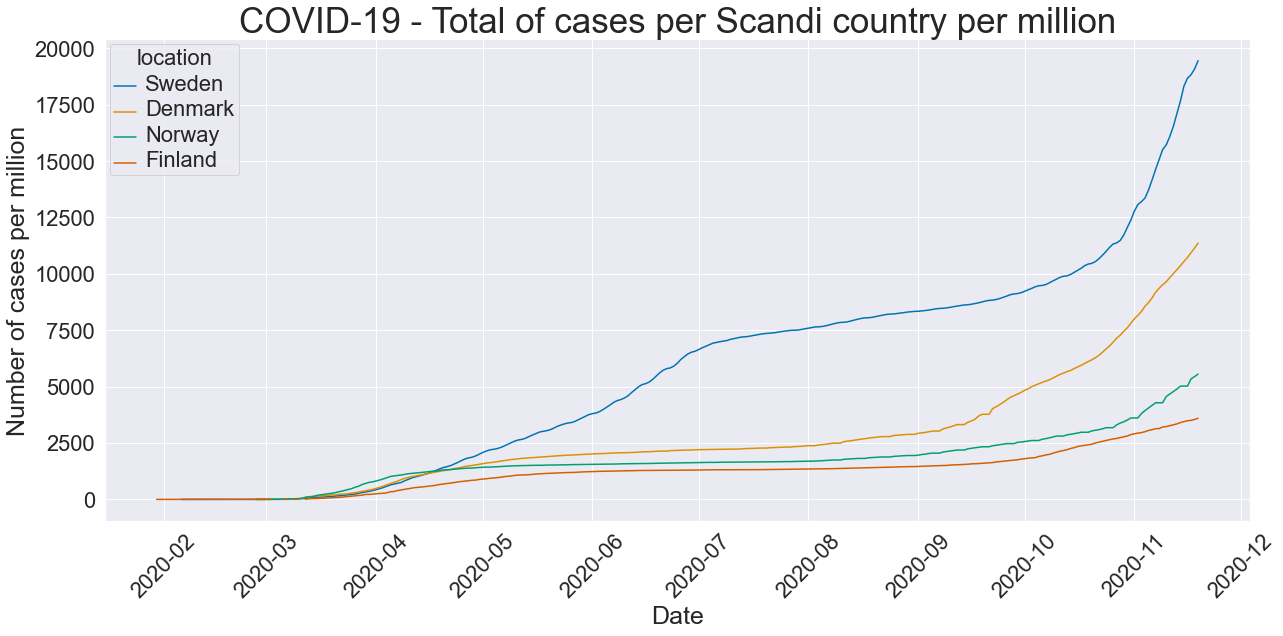

In [205]:
fig, ax = plot_fig('date', 'total_cases_per_million', scandi_df , 'COVID-19 - Total of cases per Scandi country per million', 
                   'Date', 'Number of cases per million', plot_type='line', hue='location', palette='colorblind', output_file_name='scandi_per_million.png')

## In terms of deaths per million of the population

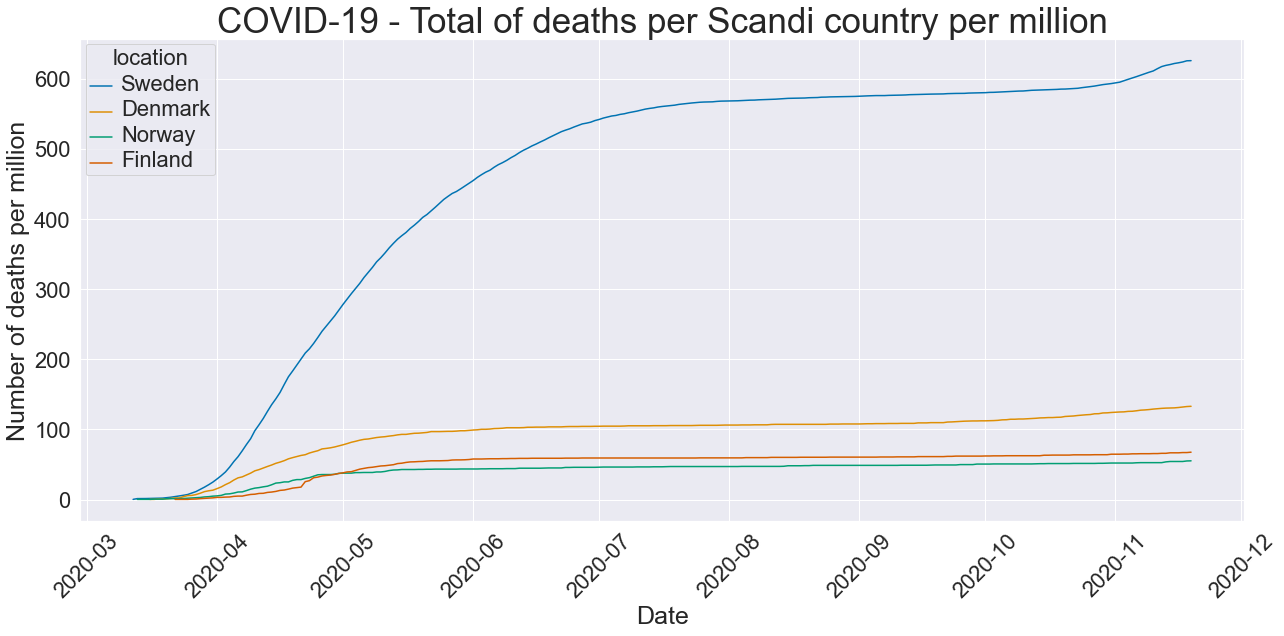

In [206]:
fig, ax = plot_fig('date', 'total_deaths_per_million', scandi_df , 'COVID-19 - Total of deaths per Scandi country per million', 
                   'Date', 'Number of deaths per million', plot_type='line', hue='location', palette='colorblind', output_file_name='scandi_deaths.png')

# Results evaluation and conclusion


## Countries most affected

The US has the most cases followed by India and then Brazil. In Europe, France and then the UK have the most cases.

Given that it is unfair to compare a country with a huge population to one with a small population we next looked at the case count per million people. The results were that the US still had the most cases per million, followed by France and then Argentina. In fact 6 out of the top 10 countries measured in terms of cases per million were in the Americas. In Europe, France, the Netherlands, Portugal and the UK were in the top 10.

Cases aren't often the whole story as the number of cases recorded is bound to be reflective of the number of tests done. President Trump often repeated the line that the case numbers in the US were only so high because it was leading the world in testing.  We saw however that the US also came out number one in terms of total deaths. However again considering the US has a large population, maybe we should take that into account and look at the deaths per million?

Looking at the deaths per million indeed showed the US in a much more favourable light. The US dropped to number 7 when ranked this way. Argentina, Brazil and Chile were the top 3 countries when viewed in terms of the number of deaths per million.

We also found that 67% of wordwide Covid-19 deaths came from the top 10 (by total deaths) countries 


## What countries did the most testing?

Was President Trump correct to say that the US leads the world in testing? It seems the answer is indeed 'yes'. The US had performed over 500 tests per thousand of population. The UK, Russia and Belgium followed.

## The Rise of Covid

Covid cases started to shoot up exponentially around mid march (at least in terms of recorded cases). The US has led the way in terms of total cases for a long time. Most of the time Brazil followed in second place, but in early September India overtook Brazil to have the 2nd most Covid cases.

In terms of total deaths we saw a similar story. The US leading with little sign of flattening, however Brazil was firmly in the number 2 spot and India has yet did not overtake Brazil in terms of total deaths. The UK did flatten its curved in May and the number of deaths remained constant more or less for many months until around November were a second wave rise seems to be taking place.

Once again we have to take into aaccount the different size of countries, and plotting the total deaths per million over time reveals an interesting story. Argentina comes out in the top place currently, but was very late to the party. Argentina initially had a very strict lockdown but it was lifted late July and it seems the death rate has soared since.


## The impact of lockdowns on increasing death rates 

To answer this question, the UK was focussed on as a case study.  Plots of the daily death new death counts were produced that clearly showed the first and second wave. The first lockdown in the UK on the 23 of March seemed to have taken 2-3 weeks to slow down the increase in daily deaths, and the second lockdown introduced on the 5 Nov still does not seem to have had an effect.

## Cases to deaths lags

Brazil was studied to answer this question, and with the help of a log scale plot it was seen that the death count seemed to lag behind the case count by approximately 2 weeks.

## Economic impact

To measure the impact Covid had on the economies around the world, we looked at the shrinkage of the Q2 2020 GDP compared to the Q2 2019 GDP.  China and Turkey seemed to be not suffer at all and even experienced some growth. Unsurprisngly, perhaps countries known to be hit hardest and earliest like Spain, Italy, France in Europe took a hit in that quarter. It seems also that Saudi Arabia 
suffered economically. Could this be to lockdowns reducing the demand for oil? or is it just some artefact of the measure being used here to quantify economic impact?

## Sweden vs its neighbours

Sweden had a much less stringent lockdown that its neighbours. Let's see in more detail how it fared in economic terms and also how covid progressed there. Its economy  fared better than that of Denmark and Norway but not as well as that of Finland. However its cases and deaths (even per million) were much greater than other Scandinavian countries.


